## Email Spam Classifier

In [150]:
import numpy as np 
import pandas as pd 

In [151]:
df = pd.read_csv('Spam.csv',encoding='ISO-8859-1')

In [152]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [153]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [154]:
df = df.rename(columns={'v1':'label'})
df = df.rename(columns={'v2':'text'})

In [155]:
df  = df.replace(to_replace="spam",
           value=1)

df  = df.replace(to_replace="ham",
           value=0)

In [156]:
df.sample(5)

,label,text
1303,0,I cant pick the phone right now. Pls send a me...
3487,0,Still i have not checked it da. . .
4376,0,How much is torch in 9ja.
86,0,For real when u getting on yo? I only need 2 m...
5411,0,I ask if u meeting da ge tmr nite...


In [157]:
df.shape

(5572, 2)

In [158]:
# Importing Data 
# Data Cleaning 
# EDA 
# Text Preprocessing 
# Model building 
# Evaluation 
# Improvements 
# Convert to website and Deploy to Heroku

# 1. Data Cleaning

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [160]:
# we have no Null values, which is a good sign

In [161]:
# changing the column name 

In [162]:
df.rename(columns={'label':'target'},inplace=True)
df.sample(5)

,target,text
2978,1,"Xmas Offer! Latest Motorola, SonyEricsson & No..."
2786,0,cThen i thk shd b enuff.. Still got conclusion...
1732,0,"K, can that happen tonight?"
4607,0,We live in the next &lt;#&gt; mins
1929,1,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...


In [163]:
# Checking for Null valus 

In [164]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [165]:
# check for Duplicate

In [166]:
df.duplicated().sum()

403

In [167]:
df.shape

(5572, 2)

# EDA (Exploratory Data Analysis)

In [168]:
# check for count of Spam and Non-Spam 

In [169]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [170]:
# Pie chart Representation 

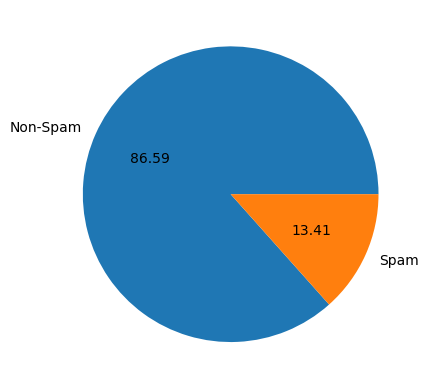

In [171]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Non-Spam','Spam'],autopct='%0.2f')
plt.show()

In [172]:
# There is a slight imbalance in Data between non-Spam and Spam

In [173]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [174]:
import nltk

In [175]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Vinay
[nltk_data]     Bhati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [176]:
# Make New columns (Number of characters in text)

In [177]:
df['num_characters'] = df['text'].apply(len)

In [178]:
# Number of Words

In [179]:
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [180]:
# Number of sentences 

In [181]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [182]:
# Use Describe to see what is happening inside the emails, we will do Describe for Spam and non-spam seperately

In [183]:
#non-spam
df[df['target'] == 0][['num_characters','num_word','num_sentence']].describe()

,num_characters,num_word,num_sentence
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [184]:
#spam
df[df['target'] == 1][['num_characters','num_word','num_sentence']].describe()

,num_characters,num_word,num_sentence
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [185]:
# Plotting Histogram to see the difference visually. 

In [186]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

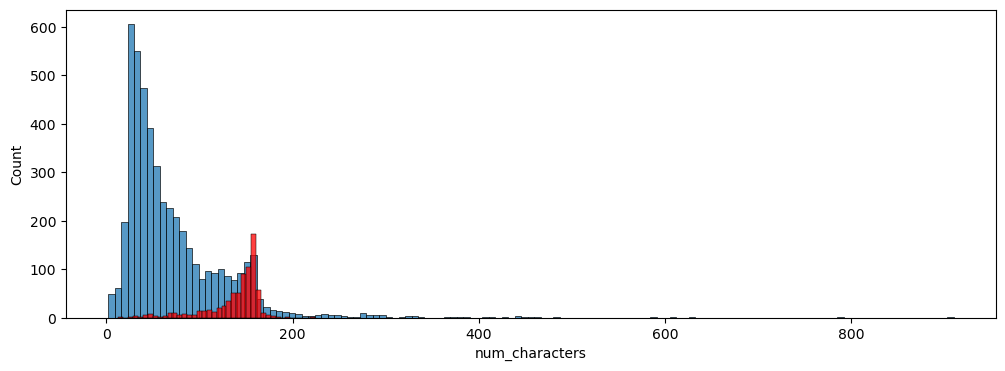

In [187]:
plt.figure(figsize=(12,4))
#plt.xticks(range(1, 10000))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color ='red')

<Axes: xlabel='num_word', ylabel='Count'>

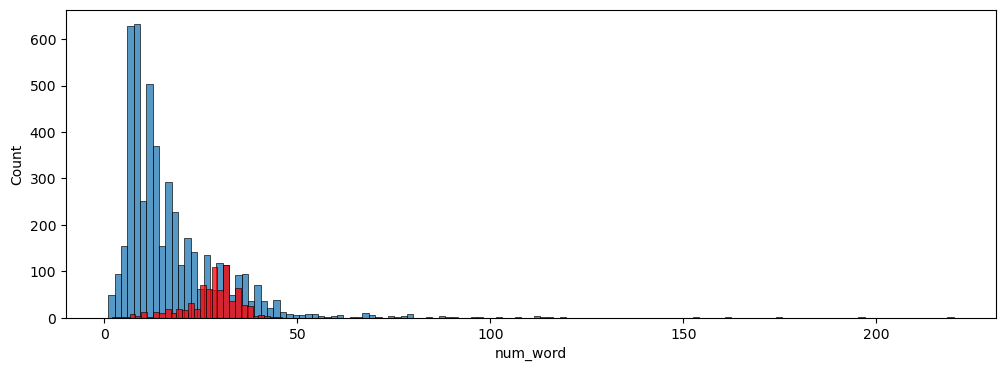

In [188]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'],color ='red')

C:\Users\Vinay Bhati\AppData\Local\Temp\ipykernel_21396\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

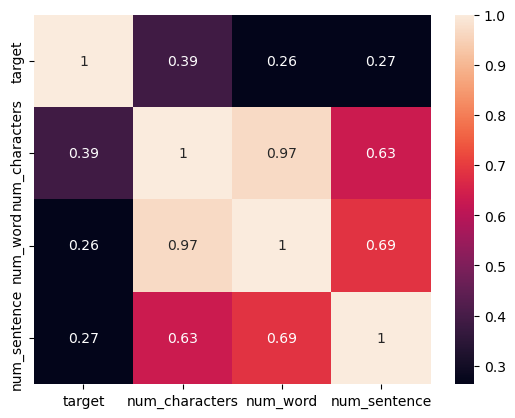

In [189]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing 
1. Lowercase 
2. Tokenization 
3. Removing Special Characters
4. Removing Stop Word and punctuation 
5. Stemming 

In [190]:
# for Removing Stopwords and Punctuation
from nltk.corpus import stopwords
import string 

# for Stemming
from nltk.stem.porter import PorterStemmer
PS = PorterStemmer()

In [191]:
def transform_text(text):
    text = text.lower()   # Lowercasing
    text = nltk.word_tokenize(text) #Tokenizing(Breaking a sentence into words)
    
    y = []
    for i in text:
        if i.isalnum(): # Removing Special Characters 
            y.append(i)
    text = y.copy()
    #print(text)
    y.clear()
    
    for i in text:     # Removing Stopwords and punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y.copy()
    y.clear()
        
    for i in text:     # Stemming the word to root form
        y.append(PS.stem(i))
        
    
    return " ".join(y)

In [192]:
df['text'][20]

'Is that seriously how you spell his name?'

In [193]:
transform_text(df['text'][20])

'serious spell name'

In [194]:
df['transformed'] = df['text'].apply(transform_text)

In [195]:
df.sample(5)

,target,text,num_characters,num_word,num_sentence,transformed
1004,0,Umma. Did she say anything,26,6,2,umma say anyth
3247,0,Also track down any lighters you can find,41,8,1,also track lighter find
439,0,But i have to. I like to have love and arrange.,47,13,2,like love arrang
1126,0,Not tonight mate. Catching up on some sleep. T...,79,19,3,tonight mate catch sleep new number way
833,0,Thank you so much. When we skyped wit kz and s...,215,51,7,thank much skype wit kz sura didnt get pleasur...


In [196]:
# Generate a Word Cloud 

In [197]:
# Creating wordcloud for Spam Messages

In [198]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height= 500, min_font_size= 10, background_color='White')

In [199]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed'].str.cat(sep = " "))

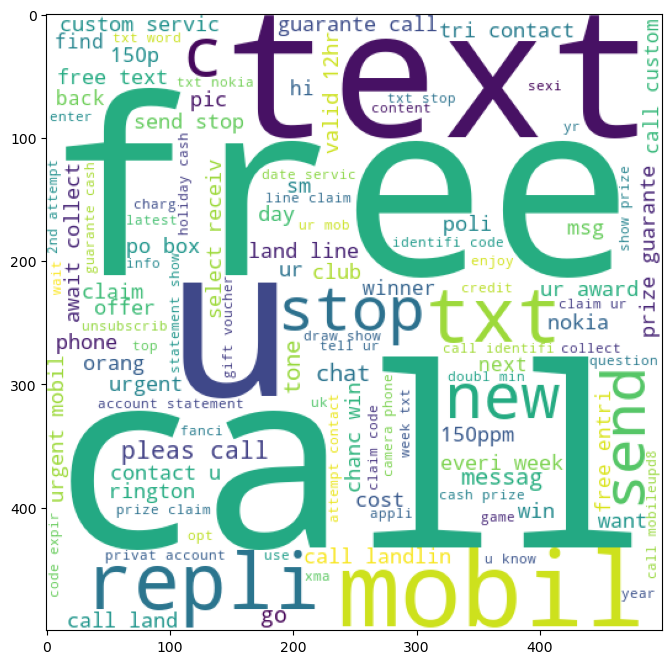

In [200]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [201]:
# Creating wordcloud for non-spam messages

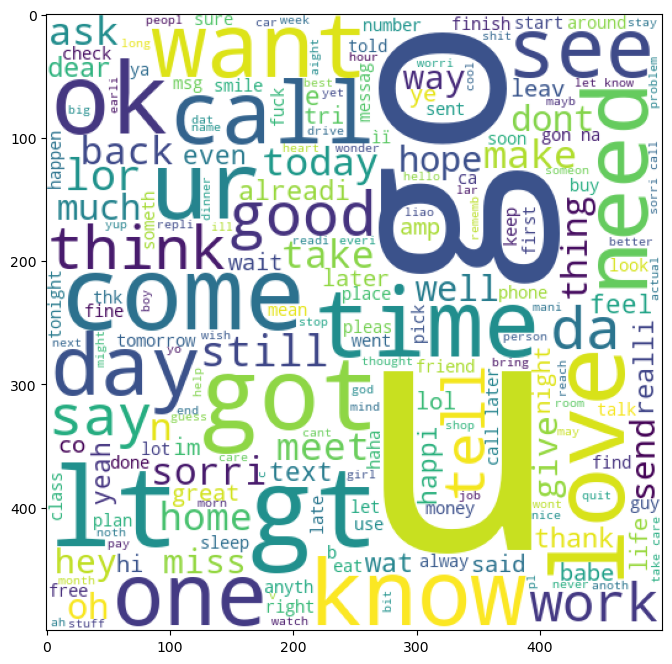

In [202]:
nonspam_wc = wc.generate(df[df['target'] == 0]['transformed'].str.cat(sep = " "))
plt.figure(figsize=(15,8))
plt.imshow(nonspam_wc)

In [203]:
# Dsiplaying the Same word cloud using collection package and Counter method in collections for Spam Messages 

In [204]:
spam_corpus = list()
for msg in df[df['target'] == 1]['transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    
len(spam_corpus)

11490

In [205]:
from collections import Counter

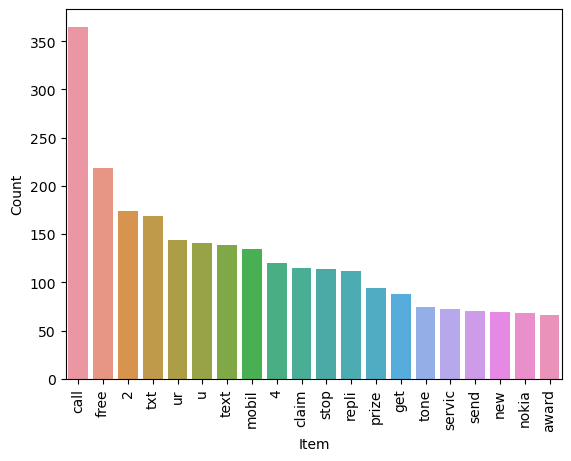

In [206]:
# Assuming spam_corpus is a list of items you want to count
spam_counter = Counter(spam_corpus)

# Create a DataFrame from the Counter object
spam_corpus = pd.DataFrame(spam_counter.most_common(20), columns=['Item', 'Count'])

# Create a bar plot using Seaborn
sns.barplot(x='Item', y='Count', data=spam_corpus)
plt.xticks(rotation = 'vertical')
plt.show()

In [207]:
# Dsiplaying the Same word cloud using collection package and Counter method in collections for Non-Spam Messages 

In [208]:
nonspam_corpus = list()
for msg in df[df['target'] == 0 ]['transformed']:
    for word in msg.split():
        nonspam_corpus.append(word)

In [209]:
nonspam_corpus = Counter(nonspam_corpus)

In [210]:
nonspam_corpus = pd.DataFrame(nonspam_corpus.most_common(20),columns =['item','count'])

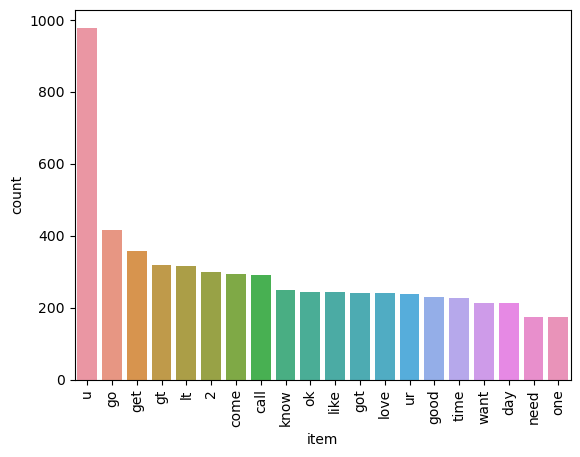

In [212]:
sns.barplot(x = 'item', y = 'count', data=nonspam_corpus)
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [305]:
# Step:1 Vectorizing the data 

In [306]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# If you Forget we first tested all models by CountVectorizer and we were not satidfied by the score, so we had another method
# for vectorization that is Tfidfvectorization and we found that the muntinominalNB performed better with precision score of 1
# Which means that the model did not make any wrong prediction
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [307]:
X = tfidf.fit_transform(df['transformed']).toarray()

In [308]:
X.shape

(5572, 6708)

In [309]:
y = df['target'].values

In [310]:
from sklearn.model_selection import train_test_split


In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [312]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix

In [313]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [314]:
# Training Gassian naive based model and then Printing the accuracy score, precision score and confusion matrix

In [315]:
gnb.fit(X_train, y_train)
y_gnb_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_gnb_pred))
print(confusion_matrix(y_test, y_gnb_pred))
print(precision_score(y_test, y_gnb_pred))

0.8600896860986547
[[826 139]
 [ 17 133]]
0.4889705882352941


In [316]:
# Training Multinominal naive based model and then Printing the accuracy score, precision score and confusion matrix

In [317]:
mnb.fit(X_train,y_train)
y_mnb_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_mnb_pred))
print(precision_score(y_test,y_mnb_pred))
print(confusion_matrix(y_test,y_mnb_pred))

0.9632286995515695
1.0
[[965   0]
 [ 41 109]]


In [318]:
# Training Bernouli naive based model and then Printing the accuracy score, precision score and confusion matrix

In [319]:
bnb.fit(X_train,y_train)
y_bnb_pred = bnb.predict(X_test)
print(accuracy_score(y_test,y_bnb_pred))
print(precision_score(y_test,y_bnb_pred))
print(confusion_matrix(y_test,y_bnb_pred))

0.967713004484305
0.9672131147540983
[[961   4]
 [ 32 118]]


In [320]:
# Considering Precision score only, as the data is imbalanced, so accurancy won't matter that much 
# As we got the best precision score using the Multinominal Naive based model + using Tfidf Vectoization tenchnique we
# Will go with this model and Vectorization technique. 

In [321]:
# Trying 11 different models to test which other models can we select

In [283]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 7.6 MB/s eta 0:00:14
   - -------------------------------------- 2.8/99.8 MB 36.0 MB/s eta 0:00:03
   -- ------------------------------------- 6.1/99.8 MB 48.7 MB/s eta 0:00:02
   --- ------------------------------------ 9.8/99.8 MB 56.9 MB/s eta 0:00:02
   ----- ---------------------------------- 12.9/99.8 MB 72.6 MB/s eta 0:00:02
   ------ --------------------------------- 15.8/99.8 MB 65.6 MB/s eta 0:00:02
   ------- -------------------------------- 19.1/99.8 MB 65.6 MB/s eta 0:00:02
   ------- -------------------------------- 19.9/99.8 MB 54.7 MB/s eta 0:00:02
   --------- ------------------------------ 23.5/99.8 MB 54.7 MB/s eta 0:00:02
   ---------- -----

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [285]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [286]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [287]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [288]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748878923766816
Precision -  0.9621212121212122
For  KN
Accuracy -  0.9121076233183857
Precision -  1.0
For  NB
Accuracy -  0.9632286995515695
Precision -  1.0
For  DT
Accuracy -  0.9434977578475336
Precision -  0.8918918918918919
For  LR
Accuracy -  0.9426008968609866
Precision -  0.9056603773584906
For  RF
Accuracy -  0.9757847533632287
Precision -  1.0
For  AdaBoost
Accuracy -  0.9614349775784753
Precision -  0.9652173913043478
For  BgC
Accuracy -  0.9713004484304932
Precision -  0.9214285714285714
For  ETC
Accuracy -  0.9757847533632287
Precision -  0.992
For  GBDT
Accuracy -  0.957847533632287
Precision -  0.9904761904761905
For  xgb
Accuracy -  0.9668161434977578
Precision -  0.952


In [289]:
accuracy_scores

[0.9748878923766816,
 0.9121076233183857,
 0.9632286995515695,
 0.9434977578475336,
 0.9426008968609866,
 0.9757847533632287,
 0.9614349775784753,
 0.9713004484304932,
 0.9757847533632287,
 0.957847533632287,
 0.9668161434977578]

In [292]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [293]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912108,1.000000
2,NB,0.963229,1.000000
5,RF,0.975785,1.000000
8,ETC,0.975785,0.992000
9,GBDT,0.957848,0.990476
6,AdaBoost,0.961435,0.965217
0,SVC,0.974888,0.962121
10,xgb,0.966816,0.952000
7,BgC,0.971300,0.921429
4,LR,0.942601,0.905660


In [295]:
# Model Improvement 

In [296]:
# First I Limit the max_feature = 3000 in TfidfVectorization which reduced the dimentionality of data resulting in better Precesion

In [297]:
# Second I tried, using Voting classifier

# Voting Classifier
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [298]:
voting = VotingClassifier(estimators=[('kn', knc), ('nb', mnb), ('rf', rfc)],voting='soft')

In [299]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('kn', KNeighborsClassifier()),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [300]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9533632286995516
Precision 1.0


In [301]:
# Pefrom Stacking

In [302]:
from sklearn.ensemble import StackingClassifier
estimators=[('kn', knc), ('nb', mnb), ('rf', rfc)]
final_estimator=RandomForestClassifier()

In [303]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [304]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9775784753363229
Precision 0.9310344827586207


In [322]:
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))